## Example: Which day of the week do the most fatal motor accidents happen on?
___

Now we're ready to work through an example. Today, we're going to be using the US Traffic Fatality Records database, which contains information on traffic accidents in the US where at least one person died. (It's definitely a sad topic, but if we can understand this data and the trends in it we can use that information to help prevent additional accidents.)

First, just like yesterday, we need to get our environment set up. Since you already know how to look at schema information at this point, I'm going to let you do that on your own. 

> **Important note:** Make sure that you add the BigQuery dataset you're querying to your kernel. Otherwise you'll get 

In [1]:
# import package with helper functions 
import bq_helper

# create a helper object for this dataset
accidents = bq_helper.BigQueryHelper(active_project="bigquery-public-data",
                                   dataset_name="nhtsa_traffic_fatalities")

We're going to look at which day of the week the most fatal traffic accidents happen on. I'm going to get the count of the unique id's (in this table they're called "consecutive_number") as well as the day of the week for each accident. Then I'm going sort my table so that the days with the most accidents are on returned first.

In [2]:
# query to find out the number of accidents which 
# happen on each day of the week
query = """SELECT COUNT(consecutive_number), 
                  EXTRACT(DAYOFWEEK FROM timestamp_of_crash)
            FROM `bigquery-public-data.nhtsa_traffic_fatalities.accident_2015`
            GROUP BY EXTRACT(DAYOFWEEK FROM timestamp_of_crash)
            ORDER BY COUNT(consecutive_number) DESC
        """

Now that our query is ready, let's run it (safely!) and store the results in a dataframe: 

In [3]:
# the query_to_pandas_safe method will cancel the query if
# it would use too much of your quota, with the limit set 
# to 1 GB by default
accidents_by_day = accidents.query_to_pandas_safe(query)

And that gives us a dataframe! Let's quickly plot our data to make sure that it's actually been sorted:

Text(0.5,1,'Number of Accidents by Rank of Day \n (Most to least dangerous)')

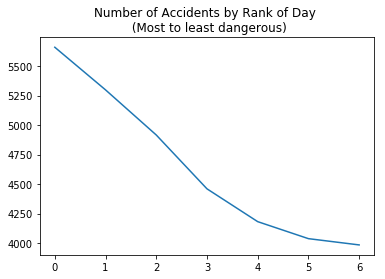

In [4]:
# library for plotting
import matplotlib.pyplot as plt

# make a plot to show that our data is, actually, sorted:
plt.plot(accidents_by_day.f0_)
plt.title("Number of Accidents by Rank of Day \n (Most to least dangerous)")

Yep, our query was, in fact, returned sorted! Now let's take a quick peek to figure out which days are the most dangerous:

In [5]:
print(accidents_by_day)

    f0_  f1_
0  5659    7
1  5298    1
2  4916    6
3  4460    5
4  4182    4
5  4038    2
6  3985    3


To map from the numbers returned for the day of the week (the second column) to the actual day, I consulted [the BigQuery documentation on the DAYOFWEEK function](https://cloud.google.com/bigquery/docs/reference/legacy-sql#dayofweek), which says that it returns "an integer between 1 (Sunday) and 7 (Saturday), inclusively". So we can tell, based on our query, that in 2015 most fatal motor accidents occur on Sunday and Saturday, while the fewest happen on Tuesday.

# Scavenger hunt
___

Now it's your turn! Here are the questions I would like you to get the data to answer:

* Which hours of the day do the most accidents occur during?
    * Return a table that has information on how many accidents occurred in each hour of the day in 2015, sorted by the the number of accidents which occurred each hour. Use either the accident_2015 or accident_2016 table for this, and the timestamp_of_crash column. (Yes, there is an hour_of_crash column, but if you use that one you won't get a chance to practice with dates. :P)
    * **Hint:** You will probably want to use the [EXTRACT() function](https://cloud.google.com/bigquery/docs/reference/standard-sql/functions-and-operators#extract_1) for this.
* Which state has the most hit and runs?
    * Return a table with the number of vehicles registered in each state that were involved in hit-and-run accidents, sorted by the number of hit and runs. Use either the vehicle_2015 or vehicle_2016 table for this, especially the registration_state_name and hit_and_run columns.

In order to answer these questions, you can fork this notebook by hitting the blue "Fork Notebook" at the very top of this page (you may have to scroll up). "Forking" something is making a copy of it that you can edit on your own without changing the original.

In [6]:
# Which hours of the day do the most accidents occur during?

query = """ select extract(hour from timestamp_of_crash) as accident_hour, count(consecutive_number) as accident_counts
from `bigquery-public-data.nhtsa_traffic_fatalities.accident_2015`
group by accident_hour
order by accident_counts DESC
 """ 


accidents_by_hour = accidents.query_to_pandas_safe(query)
accidents_by_hour

,accident_hour,accident_counts
0,18,1894
1,20,1861
2,17,1838
3,21,1810
4,19,1783
5,15,1684
6,16,1650
7,22,1555
8,0,1514
9,14,1513


Wee see that at 6pm has the highest accidents and the number of accidentst happens the most in the evening time after 3pm


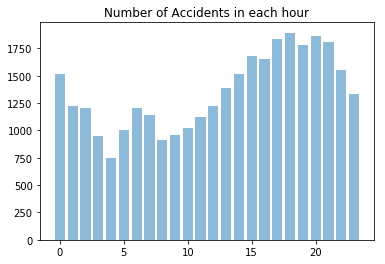

In [7]:
# library for plotting
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

# bar plot according to hour of the accident
plt.bar(accidents_by_hour['accident_hour'], accidents_by_hour['accident_counts'],align='center', alpha=0.5)
plt.title("Number of Accidents in each hour")


print('Wee see that at 6pm has the highest accidents and the number of accidentst happens the most in the evening time after 3pm')

In [8]:
# Which state has the most hit and runs?

## we need to use VEHICLE_2015 table to find number of hit & run cases

query = """ select registration_state_name as state, count(hit_and_run) as count_hit_run 
from `bigquery-public-data.nhtsa_traffic_fatalities.vehicle_2015`
where hit_and_run = 'Yes'
group by state
order by count_hit_run desc"""

hit_run = accidents.query_to_pandas_safe(query)

print('-> It is very difficult to say which state has maximum hit_run cases as it is Unknown')
print('-> California being the second highest among other states with 155 hit_run cases')
hit_run



-> It is very difficult to say which state has maximum hit_run cases as it is Unknown
-> California being the second highest among other states with 155 hit_run cases


,state,count_hit_run
0,Unknown,834
1,California,155
2,Florida,96
3,Texas,86
4,New York,38
5,Michigan,33
6,Arizona,31
7,North Carolina,30
8,Wisconsin,29
9,Georgia,26


Please feel free to ask any questions you have in this notebook or in the [Q&A forums](https://www.kaggle.com/questions-and-answers)! 

Also, if you want to share or get comments on your kernel, remember you need to make it public first! You can change the visibility of your kernel under the "Settings" tab, on the right half of your screen.